#Outlier Treatment

Important Module Importation

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Variable Declaration

In [3]:
salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

#Quartiles

In [4]:
np.quantile(salary,[0,.25,.50,.75,.1])

array([11.  , 59.  , 71.  , 90.75, 45.3 ])

Create DataFrame and Visuallization

In [5]:
df = pd.DataFrame(salary)

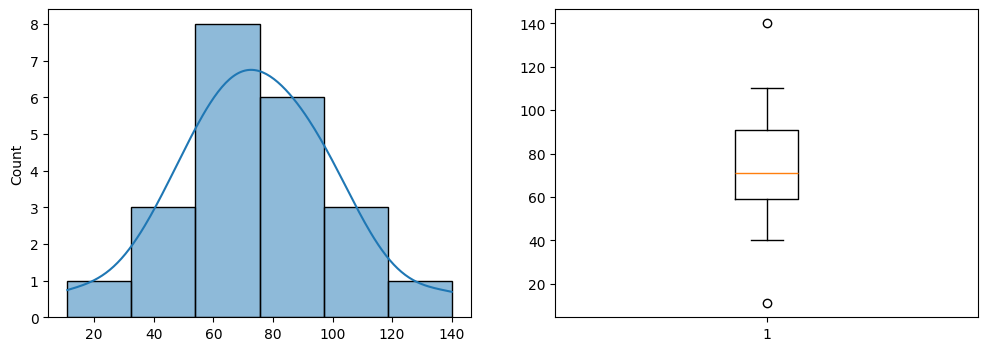

In [6]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(salary,kde=True)

plt.subplot(1,2,2)
plt.boxplot(salary)

plt.show()

In [7]:
v=pd.DataFrame(df.describe())

In [8]:
v

,0
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [9]:
#Dropping the outlier
#Capping the outlier
#replace with mean/median

In [10]:
salary

[11,
 40,
 45,
 68,
 65,
 68,
 78,
 90,
 57,
 74,
 91,
 92,
 88,
 68,
 57,
 48,
 99,
 101,
 68,
 77,
 110,
 140]

In [11]:
df = pd.DataFrame(salary, columns = ['Salary'])

In [12]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


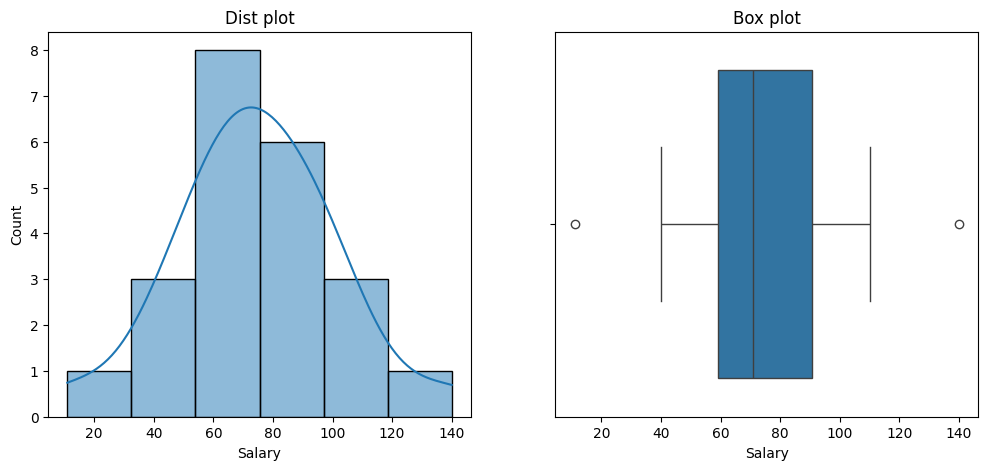

In [13]:
#To check outlier >> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde = True)
plt.title("Dist plot")


plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'Salary')
plt.title("Box plot")
plt.show()

In [14]:
#dropping the outlier

Q1 = df['Salary'].quantile(.25)
Q3 = df['Salary'].quantile(.75)

IQR = Q3-Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [15]:
Q1,Q3

(59.0, 90.75)

In [16]:
lower_fence

11.375

In [17]:
upper_fence

138.375

In [18]:
IQR

31.75

In [19]:
df['Salary'].mean()

74.31818181818181

In [20]:
filter_df = df[(df['Salary']>=lower_fence) & (df['Salary'] <= upper_fence)]

In [21]:
filter_df

,Salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [22]:
df.shape

(22, 1)

In [23]:
filter_df.shape

(20, 1)

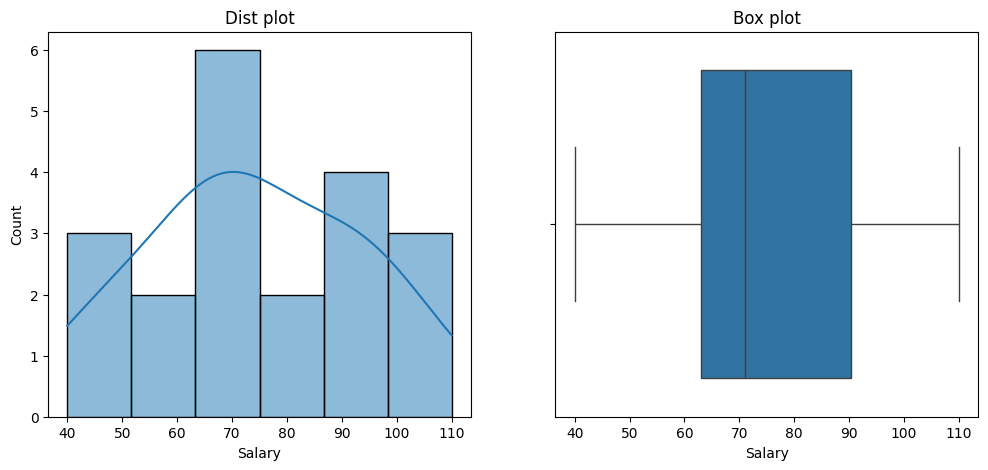

In [24]:
#To check outlier >> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(filter_df['Salary'], kde = True)
plt.title("Dist plot")


plt.subplot(1, 2, 2)
sns.boxplot(data =filter_df, x = 'Salary')
plt.title("Box plot")
plt.show()

In [25]:
#imputation with mean and media

df['Salary_imputed_mean'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])

In [26]:
df

,Salary,Salary_imputed_mean
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


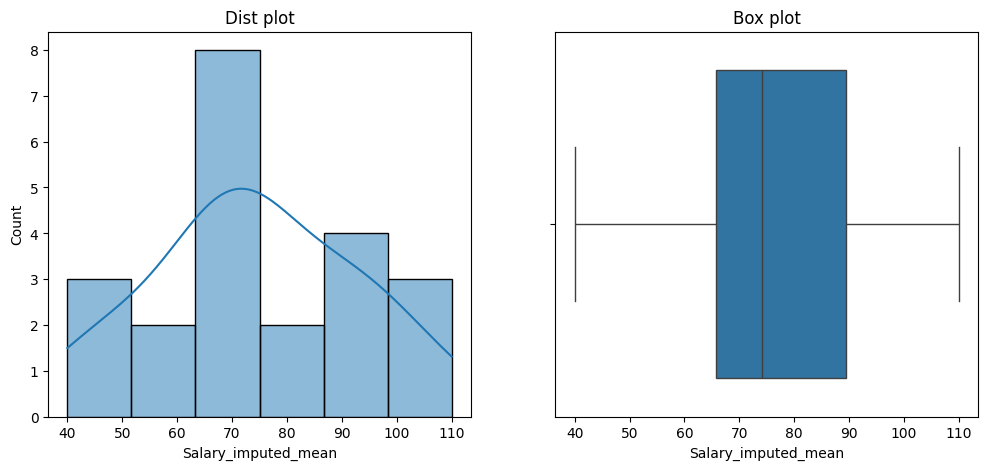

In [30]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_imputed_mean'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = df['Salary_imputed_mean'])
plt.title("Box plot")
plt.show()

In [40]:
df['Salary_imputed_median'] = np.where((df['Salary']<=lower_fence)|(df['Salary']>=upper_fence),df['Salary'].median(),df['Salary'])

In [41]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


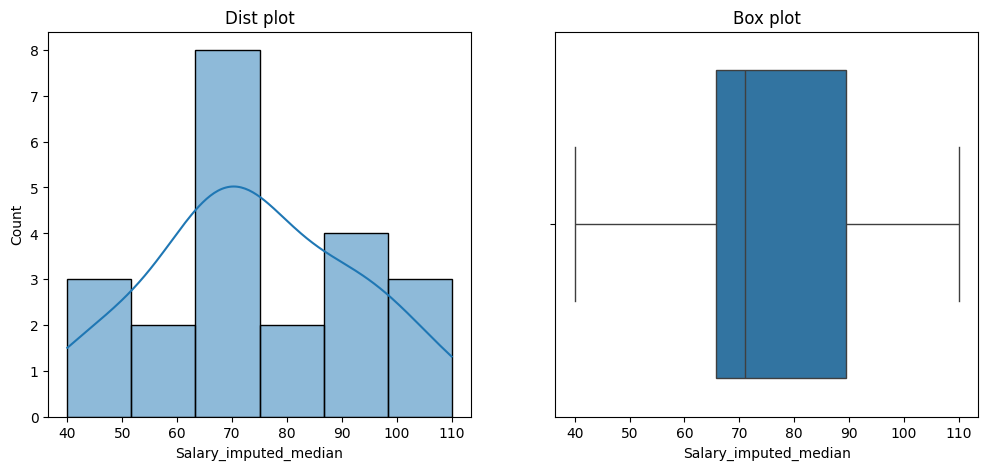

In [42]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_imputed_median'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = df['Salary_imputed_median'])
plt.title("Box plot")
plt.show()

In [44]:
#Capping >> replacing with the nearest value which is not outlier

lower_cap = df['Salary'].quantile(0.05) #lower cap as 5th percentile
upper_cap = df['Salary'].quantile(0.95) #upper cap at 95th percentile

#replace outliers with the cap

df['Salary_capped'] = np.where(df['Salary'] < lower_cap, lower_cap,
        np.where(df['Salary'] > upper_cap, upper_cap,
                df['Salary']))

In [45]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median,Salary_capped
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00


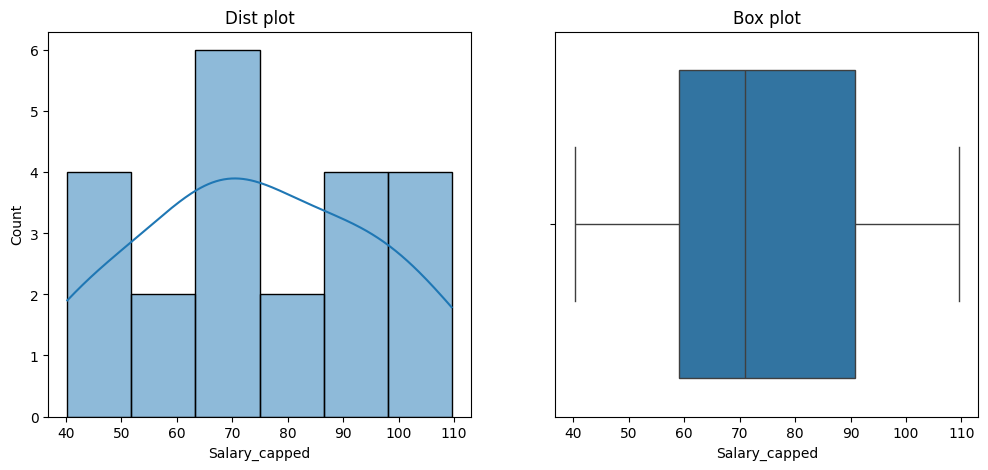

In [46]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_capped'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = df['Salary_capped'])
plt.title("Box plot")
plt.show()